In [443]:
import os
import sys

import gymnasium as gym
from torch.optim import Adam

sys.path.append(os.path.abspath(".."))

from rlib.algorithms.a2c import a2c
from rlib.algorithms.ppo import ppo
from rlib.algorithms.reinforce import reinforce
from rlib.common.evaluation import get_trajectory, validation
from rlib.common.policies import (
    DiscreteStochasticMlpPolicy,
    MlpCritic,
    StochasticMlpPolicy,
)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [395]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [396]:
print(env.observation_space.sample(), env.observation_space.sample().shape)
print(env.action_space.sample(), env.action_space.sample().shape)

[ 1.3602141e+00  2.9011312e+38 -3.8685688e-01 -2.1509378e+38] (4,)
0 ()


In [452]:
env = gym.make("Pendulum-v1", render_mode="rgb_array")

In [445]:
print(env.observation_space.sample(), env.observation_space.sample().shape)
print(env.action_space.sample(), env.action_space.sample().shape)

[-0.9877751  0.8809305 -3.9422476] (3,)
[1.2642736] (1,)


In [384]:
env = gym.make("BipedalWalker-v3")

In [385]:
print(env.observation_space.sample(), env.observation_space.sample().shape)
print(env.action_space.sample(), env.action_space.sample().shape)

[ 2.1782722  -0.7862177  -0.21187767  1.7170434  -0.36368287 -1.8191515
 -1.2151375  -2.8275526   0.22590871  0.26896387 -4.490998    1.5079538
 -0.77005315  3.3377466   0.5328349  -0.03321891 -0.29422292 -0.63958776
 -0.51001704 -0.30934176 -0.8103885   0.98810804  0.23579766  0.16712207] (24,)
[ 0.30528358 -0.8524173   0.8779433   0.30583316] (4,)


In [446]:
discrete = False

obs_dim = env.observation_space.shape[0]

if discrete:
    action_dim = env.action_space.n
else:
    action_dim = env.action_space.shape[0]

print(obs_dim, action_dim)

3 1


### Reinforce

In [272]:
# policy = DiscreteStochasticMlpPolicy(input_size, output_size)
policy = StochasticMlpPolicy(input_size, output_size, action_scale=2)
optimizer = Adam(policy.parameters(), lr=1e-3)

In [273]:
traj = get_trajectory(env, policy, deterministic=False)

In [ ]:
reinforce(env, policy, optimizer, total_timesteps=500_000)

In [264]:
policy.forward(env.observation_space.sample())

(tensor(-0.1113, grad_fn=<UnbindBackward0>),
 tensor(-0.9518, grad_fn=<UnbindBackward0>))

In [268]:
validation(env, policy, deterministic=True)

-1697.8311858462926

### A2C

In [277]:
# actor = DiscreteStochasticMlpPolicy(input_size, output_size)
actor = StochasticMlpPolicy(input_size, output_size, action_scale=2)
critic = MlpCritic(input_size)

actor_optimizer = Adam(actor.parameters(), lr=3e-4)
critic_optimizer = Adam(critic.parameters(), lr=1e-4)

In [278]:
a2c(env, actor, critic, actor_optimizer, critic_optimizer, total_timesteps=100_000)

steps_n: 2000
mean_trajectory_rewards: -1217.060302734375
mean_trajectory_length: 199.90000915527344
steps_n: 4000
mean_trajectory_rewards: -1151.2532958984375
mean_trajectory_length: 199.90000915527344
steps_n: 6000
mean_trajectory_rewards: -1255.719482421875
mean_trajectory_length: 199.90000915527344
steps_n: 8000
mean_trajectory_rewards: -991.3551025390625
mean_trajectory_length: 199.90000915527344
steps_n: 10000
mean_trajectory_rewards: -1137.3951416015625
mean_trajectory_length: 199.90000915527344
steps_n: 12000
mean_trajectory_rewards: -1250.375244140625
mean_trajectory_length: 199.90000915527344
steps_n: 14000
mean_trajectory_rewards: -1279.54296875
mean_trajectory_length: 199.90000915527344
steps_n: 16000
mean_trajectory_rewards: -1271.0977783203125
mean_trajectory_length: 199.90000915527344
steps_n: 18000
mean_trajectory_rewards: -1371.1456298828125
mean_trajectory_length: 199.90000915527344
steps_n: 20000
mean_trajectory_rewards: -1120.009033203125
mean_trajectory_length: 199

In [77]:
validation(env, actor, deterministic=True)

-1205.740195305502

### PPO

In [461]:
if discrete:
    actor = DiscreteStochasticMlpPolicy(obs_dim, action_dim)
else:
    actor = StochasticMlpPolicy(obs_dim, action_dim)

critic = MlpCritic(obs_dim)

actor_optimizer = Adam(actor.parameters(), lr=1e-4)
critic_optimizer = Adam(critic.parameters(), lr=5e-4)

In [462]:
ppo(env, actor, critic, actor_optimizer, critic_optimizer)

steps_n: 4000
mean_trajectory_rewards: -1381.993408203125
mean_trajectory_length: 199.9499969482422
steps_n: 8000
mean_trajectory_rewards: -1453.8677978515625
mean_trajectory_length: 199.9499969482422
steps_n: 12000
mean_trajectory_rewards: -1234.894287109375
mean_trajectory_length: 199.9499969482422
steps_n: 16000
mean_trajectory_rewards: -1294.49365234375
mean_trajectory_length: 199.9499969482422
steps_n: 20000
mean_trajectory_rewards: -1193.3192138671875
mean_trajectory_length: 199.9499969482422
steps_n: 24000
mean_trajectory_rewards: -1218.862548828125
mean_trajectory_length: 199.9499969482422
steps_n: 28000
mean_trajectory_rewards: -1150.4578857421875
mean_trajectory_length: 199.9499969482422


KeyboardInterrupt: 

In [450]:
validation(env, actor, deterministic=True)

-196.01602833050853

MovieWriter imagemagick unavailable; using Pillow instead.


saving...


{'states': [array([ 0.01916282,  0.99981636, -0.15358567], dtype=float32),
  array([0.00435015, 0.9999905 , 0.2962766 ], dtype=float32),
  array([-0.03295734,  0.99945676,  0.7462695 ], dtype=float32),
  array([-0.09470269,  0.9955056 ,  1.2376302 ], dtype=float32),
  array([-0.17810252,  0.98401195,  1.6842595 ], dtype=float32),
  array([-0.28293487,  0.9591391 ,  2.155897  ], dtype=float32),
  array([-0.4048079 ,  0.91440177,  2.598322  ], dtype=float32),
  array([-0.54566306,  0.83800465,  3.2082286 ], dtype=float32),
  array([-0.7002716,  0.7138765,  3.9719546], dtype=float32),
  array([-0.8438213,  0.5366243,  4.5717387], dtype=float32),
  array([-0.950611 ,  0.3103848,  5.0166736], dtype=float32),
  array([-0.9989602 ,  0.04559056,  5.399829  ], dtype=float32),
  array([-0.9723702 , -0.23344412,  5.624491  ], dtype=float32),
  array([-0.8674159, -0.4975838,  5.703857 ], dtype=float32),
  array([-0.6964751, -0.717581 ,  5.5902367], dtype=float32),
  array([-0.481943 , -0.8762026, 

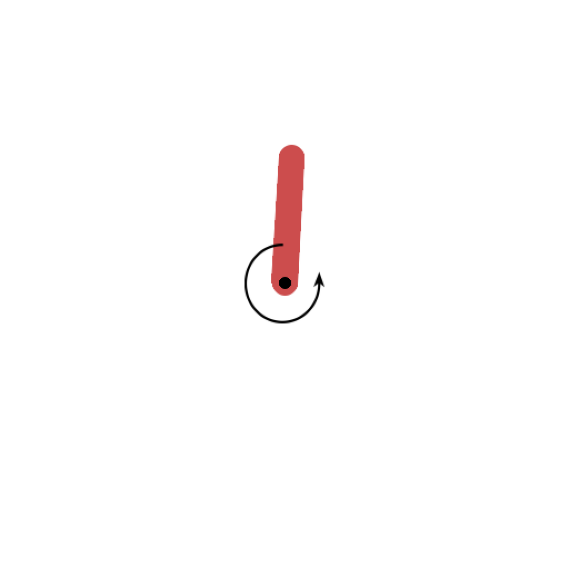

In [453]:
get_trajectory(env, actor, True, True)

In [400]:
obs, _ = env.reset()

In [401]:
obs.shape

(4,)

In [402]:
actor.predict(env.observation_space.sample())

(1, tensor([-1.1921e-07], grad_fn=<SqueezeBackward1>))

In [403]:
torch.cat(
    [
        actor.predict(env.observation_space.sample())[1],
        actor.predict(env.observation_space.sample())[1],
    ], dim=0
).shape

torch.Size([2])

In [425]:
from rlib.common.buffer import RolloutBuffer

In [426]:
rb = RolloutBuffer()

In [427]:
rb.collect_rollouts(env, actor, rollout_size=10)

In [428]:
data = rb.get_data()

In [429]:
data["observations"].shape

torch.Size([10, 3])

In [430]:
data["actions"].shape

torch.Size([10, 1])

In [431]:
actor.forward(data["observations"])[0].shape

torch.Size([10, 1])

In [432]:
import torch

In [433]:
observations = data["observations"]
actions = data["actions"]
old_log_probs = data["log_probs"]
epsilon = 0.1

In [434]:
actions.shape

torch.Size([10, 1])

In [458]:
loss = {}

_, new_log_probs = actor.get_action(observations, action=actions)

ratio = torch.exp(new_log_probs - old_log_probs.detach())
ratio_clipped = torch.clamp(ratio, 1 - epsilon, 1 + epsilon)

values = critic(observations).reshape(ratio.shape)

targets = data["q_estimations"].reshape(ratio.shape)
advantages = targets.detach() - values
# print(targets.shape, values.shape, advantages.shape)
# print(old_log_probs.shape, new_log_probs.shape, ratio.shape)

if True:
    mean = advantages.mean()
    std = advantages.std()
    advantages = (advantages - mean) / (std + 1e-8)

actor_loss_1 = ratio * advantages.detach()
actor_loss_2 = ratio_clipped * advantages.detach()

print(advantages)
print(advantages.shape)

loss["actor"] = -(torch.min(actor_loss_1, actor_loss_2)).mean()
loss["critic"] = (advantages**2).mean()

print(loss["actor"].shape, loss["critic"].shape)

tensor([[-1.3740],
        [-1.1309],
        [-0.8666],
        [-0.5748],
        [-0.2473],
        [ 0.1240],
        [ 0.5114],
        [ 0.8700],
        [ 1.1968],
        [ 1.4914]], grad_fn=<DivBackward0>)
torch.Size([10, 1])
torch.Size([]) torch.Size([])


In [13]:
validation(env, actor, deterministic=True)

-945.4736045591187

In [142]:
mu = torch.zeros((1, 2))
mu

tensor([[0., 0.]])

In [144]:
std = torch.ones((1, 2))
std

tensor([[1., 1.]])

In [145]:
from torch.distributions import Normal

In [146]:
dist = Normal(mu, std)
action = dist.sample()

In [148]:
action.shape

torch.Size([1, 2])

In [151]:
dist.log_prob(action).shape

torch.Size([1, 2])

In [153]:
dist.log_prob(action).sum(dim=1)

tensor([-1.9676])

In [180]:
from stable_baselines3 import PPO

In [191]:
env = gym.make("Pendulum-v1")
agent = PPO("MlpPolicy", env)

In [192]:
env.reset()

(array([ 0.03049863, -0.9995348 ,  0.8736682 ], dtype=float32), {})

In [193]:
action, _ = agent.predict(
    env.observation_space.sample(),
)

In [195]:
action

array([-1.9694774], dtype=float32)

In [194]:
env.step(action)

(array([ 0.02193137, -0.9997595 , -0.17140453], dtype=float32),
 -2.4527108869676995,
 False,
 False,
 {})